In [33]:
# Importing libraries in Python
import sklearn.datasets as datasets
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV,train_test_split  #hyperparameter tuning and data split 

# Loading the iris dataset
iris=datasets.load_iris()

# Forming the iris dataframe
df=pd.DataFrame(iris.data, columns=iris.feature_names)
print(df.head(5))

y=iris.target
print(y)

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


## Author: Aya Fergany Mahdy
**Domain**: **Data** **Science** **and** **Business** **Analytics** **Intern**

**Task6**: **Prediction** **using** **Decision** **Tree** **Algorithm**



In [21]:
#reloading iris dataset using sns to create pairplot later in notebook
iris1 = sns.load_dataset('iris')
#dataframe containing features 
X = pd.DataFrame(iris.data[:,:], columns = iris.feature_names[:])
#label
y = pd.DataFrame(iris.target,columns=['Species'])

In [23]:
print(X.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [24]:
print(y.head())

   Species
0        0
1        0
2        0
3        0
4        0


In [15]:
df.isnull().any()

sepal length (cm)    False
sepal width (cm)     False
petal length (cm)    False
petal width (cm)     False
dtype: bool

In [25]:
X.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
dtype: object

In [26]:
X.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


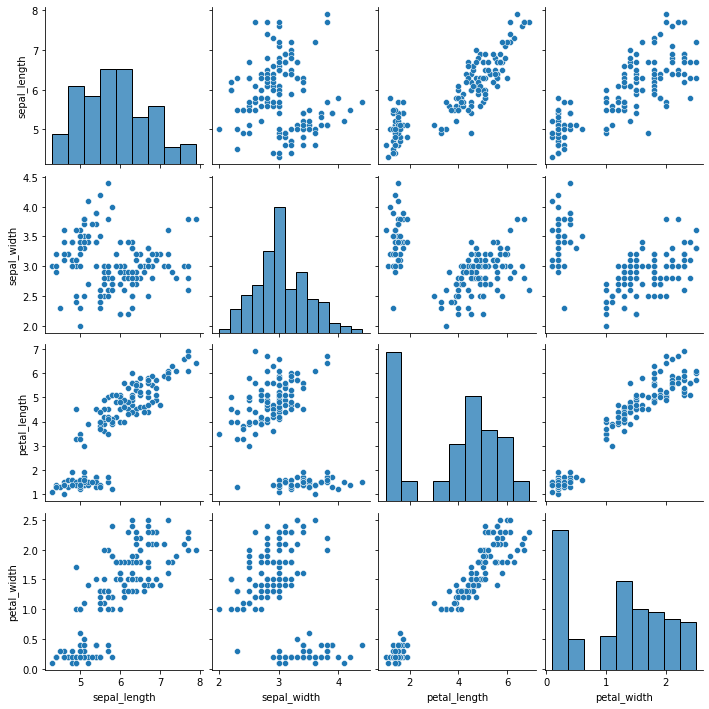

In [27]:
sns.pairplot(iris1)

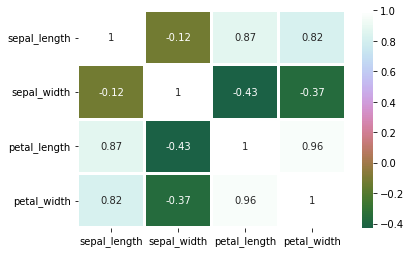

In [30]:
#depict corr between features
sns.heatmap(iris1.corr(),annot=True,cmap='cubehelix',center=0,linewidths=1.9)

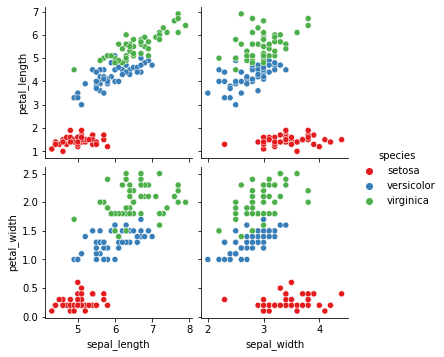

In [31]:
#this plot depicts correlation between sepal length/width to petal length/width
sns.pairplot(iris1,x_vars=['sepal_length','sepal_width'], 
             y_vars=['petal_length','petal_width'],hue='species',palette='Set1')

In [34]:
#splitting data into 70% train and 30% test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=12)

[]

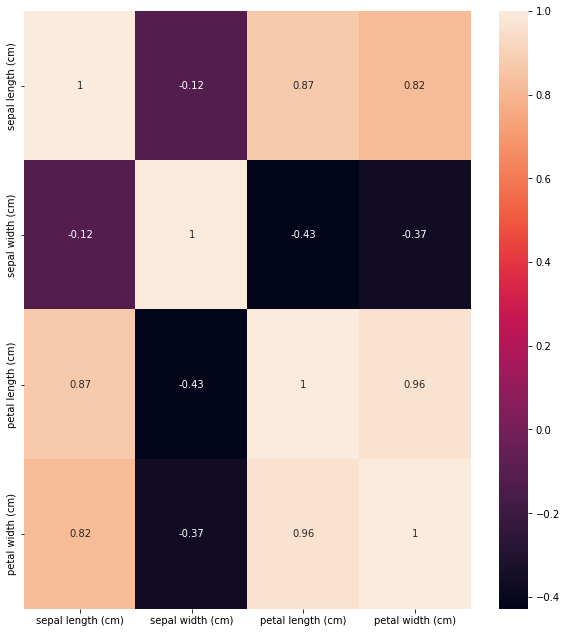

In [12]:
plt.figure(figsize=(10,11))
sns.heatmap(df.corr(),annot=True)
plt.plot()

In [39]:
# Defining the decision tree algorithm
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(df,y)

print('Decision Tree Classifer Created')

Decision Tree Classifer Created


In [38]:
# Install required libraries
!pip install pydotplus
!apt-get install graphviz -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [40]:
import six
import sys
sys.modules['sklearn.externals.six']=six

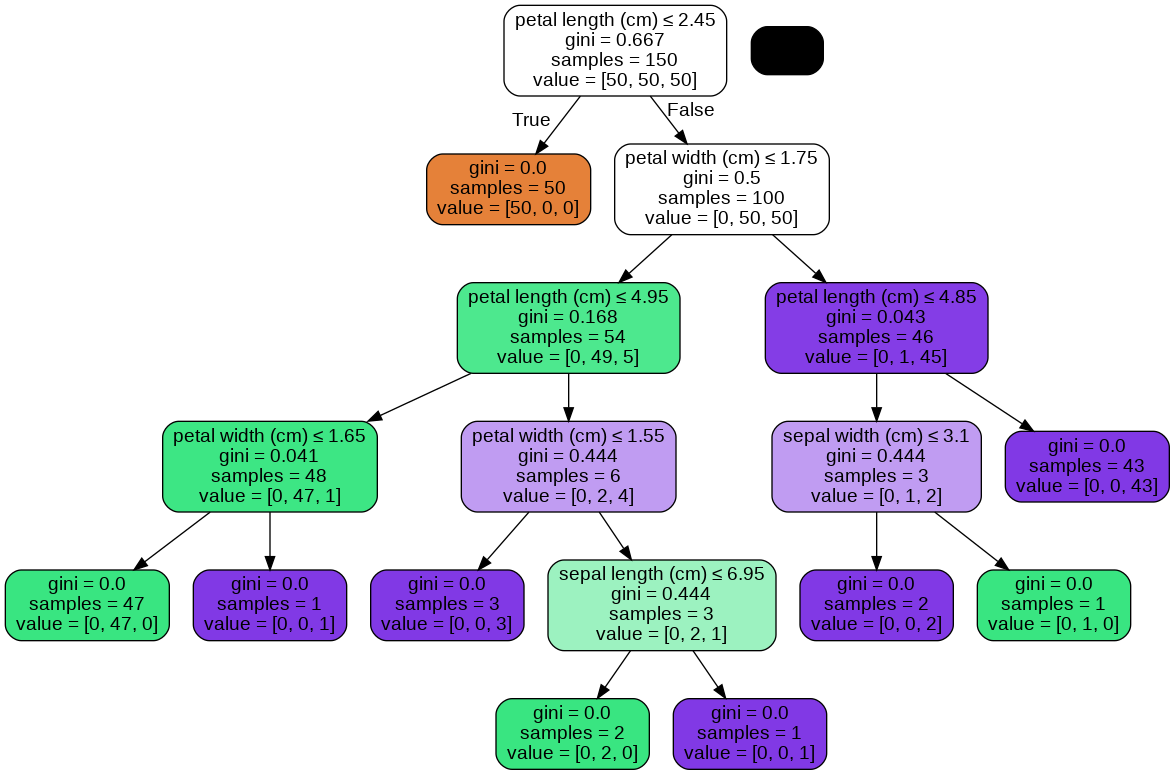

In [41]:
# Import necessary libraries for graph viz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# Visualize the graph
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, feature_names=iris.feature_names,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())